<h1>Prediction Using Supervised Machine Learning</h1>

<h2>Author-Argha Das</h2>

<h3>Importing Librery</h3>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

<h3>Importing Dataset</h3>

In [2]:
df_student=pd.read_csv('Student_score.csv')

In [4]:
df_student.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h3>Check the Null Value</h3>

In [5]:
df_student.isnull().sum()

Hours     0
Scores    0
dtype: int64

<h4>Observation</h4>
<p>There is no Null Value in the Dataset ,We can proceed with visualization</p> 

<h3>Visualize Marks vs Study Hrs using scatter plot</h3>

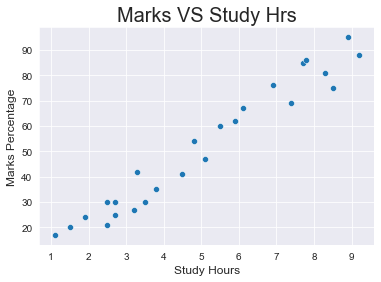

In [6]:
sns.set_style('darkgrid')
sns.scatterplot(y=df_student['Scores'] , x=df_student['Hours'])
plt.title('Marks VS Study Hrs', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Study Hours', size=12)
plt.show()


<h4>Observation</h4>
<p>From this Scatter plot  it looks correlated between Marks percentage and Study Hours</p>

<h3>Visualize Regression plot to confirm correlation between Marks and Study hrs</h3>

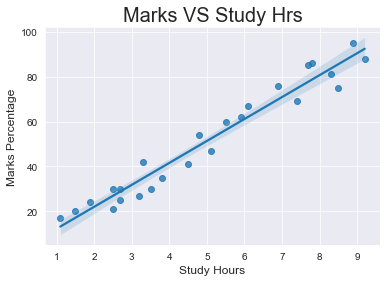

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
sns.regplot(y=df_student['Scores'] , x=df_student['Hours'])
plt.title('Marks VS Study Hrs', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Study Hours', size=12)
plt.show()
print(df_student.corr())

<h4>Observation</h4>
<p>It is confirmed that the variables are positively correlated</p>

<h2>Training the Model</h2>

<h3>Splitting the Data</h3>

In [27]:
X=df_student.iloc[:,:-1].values
y=df_student.iloc[:,1].values

#splitting the data into two 
train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=0)

<h3>Fitting the Data into the model</h3>

In [28]:
regression = LinearRegression()
regression.fit(train_X,train_y)
print("__________Model Trained__________")

__________Model Trained__________


<h3>Predicting the Percentage of Marks</h3>

In [29]:
predict_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in predict_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


<h3>Compare the Predicted Marks with the Actual Marks</h3>

In [36]:
compare_Marks = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': predict_y})
compare_Marks

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


<h3>Visualization with Scatter plot for  Predicted Marks VS Actual Marks</h3>

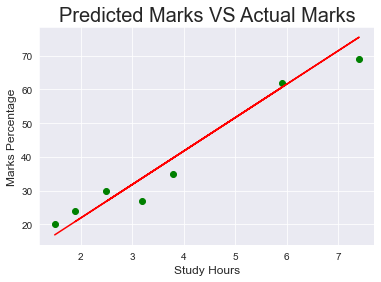

In [37]:
plt.scatter(x=val_X,y=val_y,color='green')
plt.plot(val_X,predict_y,color='red')
plt.title('Predicted Marks VS Actual Marks', size=20)
plt.ylabel('Marks Percentage' , size=12)
plt.xlabel('Study Hours' , size=12)
plt.show()

<h3>Find Mean Absolute Error</h3>

In [40]:
print('Mean Absolute Error is =',mean_absolute_error(val_y,predict_y))

Mean Absolute Error is = 4.130879918502482


<h3>What will be the predicted score of a student if he/she studies for 9.25 hrs/day ?</h3>

In [41]:
hours = [9.25]
ans = regression.predict([hours])
print("Score = {}".format(round(ans[0],3)))

Score = 93.893


<h3>Observation</h3>
<p>According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.</p>